In [1]:
path = '../../Data/data/'

In [2]:
#import necessary packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pandas import ExcelFile


## Now load the questionnaire related data from OUH and AUH 

In [3]:
#load the GN data files from AUH and OUH
with open(path + 'WP4_OUH_GN_TPI.csv') as input: 
    WP4_OUH_GN = pd.read_csv(input)
with open(path + 'WP4_AUH_GN_TPI.csv') as input: 
    WP4_AUH_GN = pd.read_csv(input)
print('WP4 GN data loaded')

#load the Oticon data files from AUH and OUH
with open(path + 'WP4_OUH_Oticon_TPI.csv') as input: 
    WP4_OUH_GN = pd.read_csv(input)
with open(path + 'WP4_AUH_Oticon_TPI.csv') as input: 
    WP4_AUH_GN = pd.read_csv(input)
print('WP4 Oticon data loaded')

#load the Widex data files from AUH and OUH
with open(path + 'WP4_OUH_Widex_TPI.csv') as input: 
    WP4_OUH_Widex = pd.read_csv(input)
with open(path + 'WP4_AUH_Widex_TPI.csv') as input: 
    WP4_AUH_Widex = pd.read_csv(input)
print('WP4 Widex data loaded')



FileNotFoundError: [Errno 2] No such file or directory: '../../Data/data/WP4_OUH_GN_TPI.csv'

In [ ]:
WP4_AUH_GN.head(20)

In [ ]:
#merge the AUH and OUH data
WP4_GN = pd.concat([WP4_OUH_GN, WP4_AUH_GN],axis=0).reset_index().drop(['index','Unnamed: 0'],axis=1)

In [ ]:
WP4_GN['RC_ID']

In [ ]:
WP4_GN.keys()[:30]

## From here on do the REM analysis

In [ ]:
#path = '../../Data/REM/WP4/'
path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX REM Files OUH/'

In [ ]:
#load all the GN REM data files from sharepoint
import os
#text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
text_files = [f for f in os.listdir(path) if f.endswith('first fit.txt')]

REM = {}
cnt = 0
for f in text_files:
    print(path+f)
    REM[cnt] = pd.read_csv(path + f,sep=';', skipinitialspace=True, index_col=False)
    #REM[cnt].drop('RC_ID', axis=1, inplace = True)
    cnt += 1


In [ ]:
REM[0]

In [ ]:
for patient_idx in range(len(text_files)):
    df = REM[patient_idx]

    freqs_s = list(df.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]

    id_right = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Right').values ))
    id_left = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Left').values ))

    plt.figure(figsize=(9,3))
    plt.subplot(1,2,2)
    plt.semilogx(freqs,df.iloc[id_left,3:],'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(-5, 40)

    plt.subplot(1,2,1)
    plt.semilogx(freqs,df.iloc[id_right,3:],'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-5, 40)


## Target analysis - draft

In [5]:
def calculateBEARtarget(audiogram, profile):
    betas = dict()
    betas['A'] = np.array([[0, 0, 1, 5, 5, 3, 3],
                           [0, 0, -2, 0, 0, 0, 0],
                           [0, 0, -5, -5, -5, -5, -5]])
    betas['B'] = np.array([[-3, -3, 1, 5, 5, 7, 7],
                           [-3, -3, -2, 0, 0, 0, 0],
                           [-6, -6, -9, -9, -9, -9, -9]])
    betas['C'] = np.array([[-2, -1.3, 1, 4, 7, 7, 7],
                           [-10, -10, -5, 0, 0, 0, 0],
                           [-14, -14, -14, -14, -14, -14, -14]])
    betas['D'] = np.array([[0, 0, 0, 3, 2, 2, 2],
                           [-6, -6, -6, -3, -3, -3, -3],
                           [-10, -10, -10, -10, -14, -14, -14]])
    target = 0.31*np.array([audiogram, audiogram, audiogram]) + betas[profile]
    
    target[target < 0] = 0

    return target

<ipython-input-5-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0
<ipython-input-5-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0


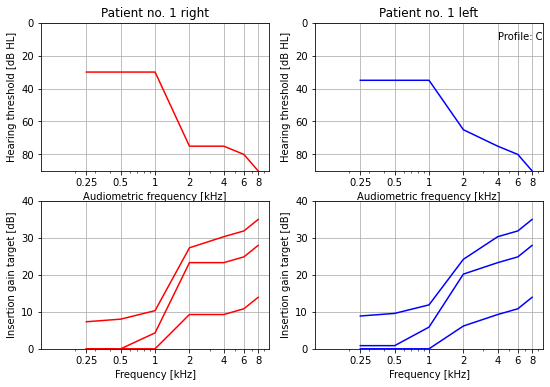

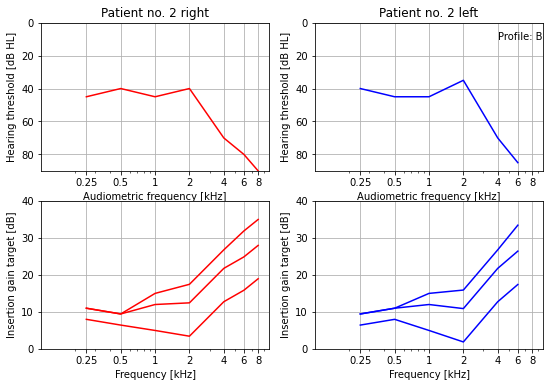

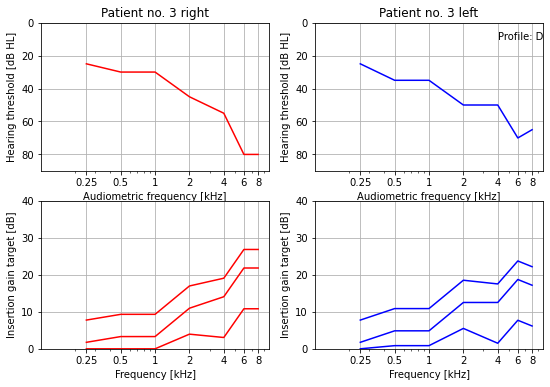

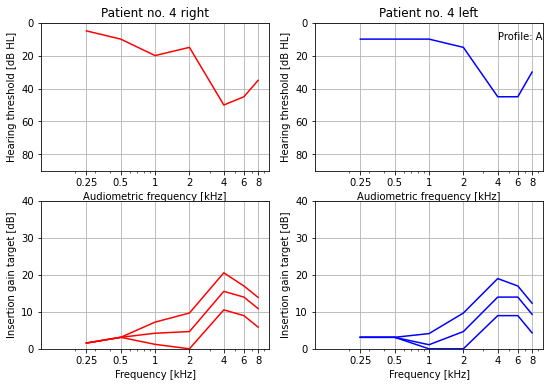

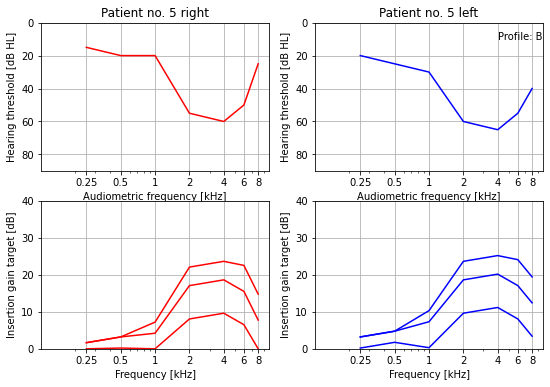

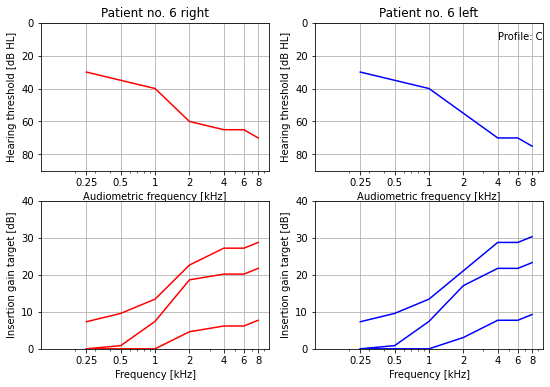

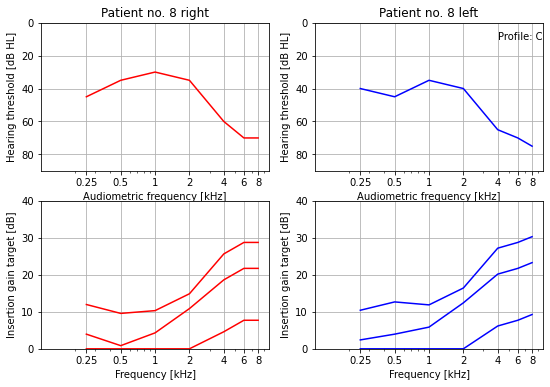

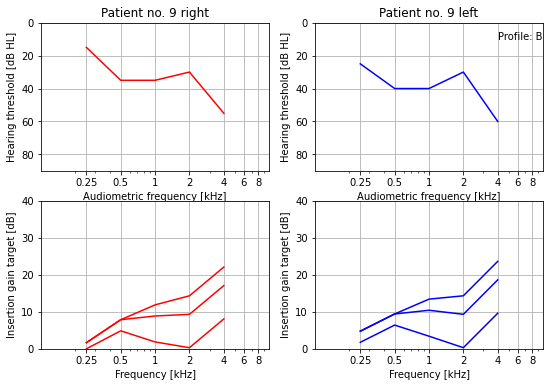

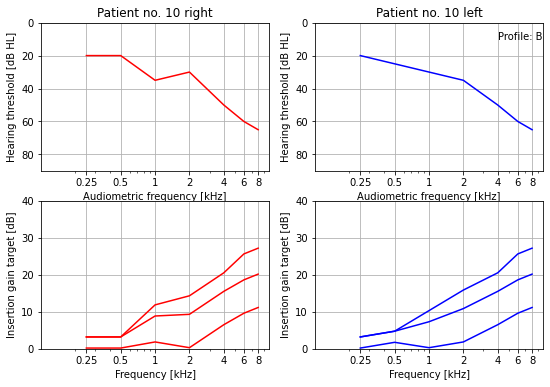

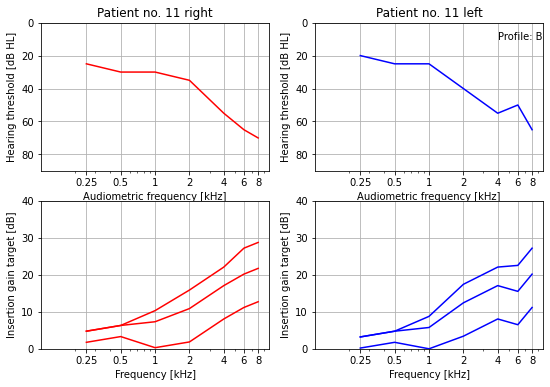

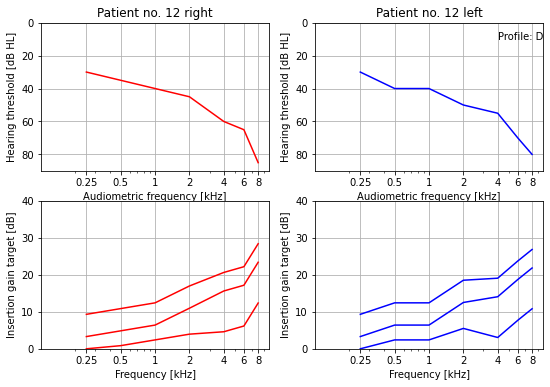

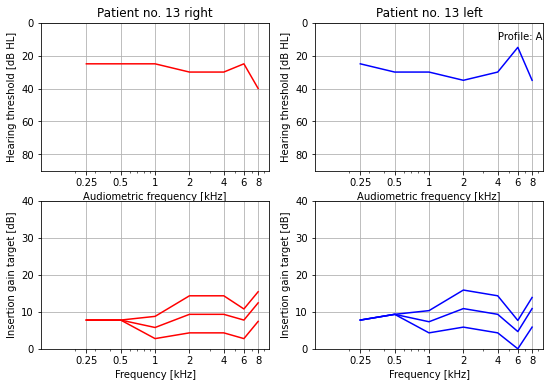

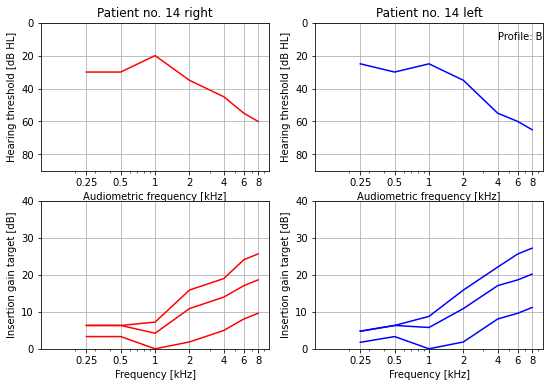

In [6]:
path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/'
df = pd.read_excel(path+'WP4 Pilots Data OUH_Widex.xlsx')
nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)
    
    plt.figure(figsize=(9,6))
    plt.subplot(2,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
    
    plt.subplot(2,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    
    plt.subplot(2,2,3)
    plt.semilogx(freqs_audio_no3k,target_right[0,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[1,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[2,:],'r')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    
    plt.subplot(2,2,4)
    plt.semilogx(freqs_audio_no3k,target_left[0,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[1,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[2,:],'b')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
